In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
# import tensorflow._api.v2.compat.v1 as v1
%matplotlib inline
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss, mean_squared_error, confusion_matrix
from numpy import array
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, BatchNormalization, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.optimizers import SGD

In [2]:
print(tf. __version__)

2.10.0


In [3]:
url = 'Dataset.csv'
df = pd.read_csv(url)
df = df.drop_duplicates()
df

,Error GPS,Altitude,Ground Speed,Output
0,0.035,2.650,0.168,0
1,0.113,4.633,0.664,0
2,0.422,0.293,0.630,0
3,0.053,5.420,1.572,0
4,0.154,0.511,2.099,0
...,...,...,...,...
795,0.609,7.545,5.788,7
796,1.915,6.644,4.848,7
797,1.517,7.070,5.572,7
798,1.611,7.196,5.097,7


In [4]:
#df = df.drop(columns=['Open Time', 'Ignore', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Error GPS     800 non-null    float64
 1   Altitude      800 non-null    float64
 2   Ground Speed  800 non-null    float64
 3   Output        800 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 31.2 KB


In [5]:
df.describe()

,Error GPS,Altitude,Ground Speed,Output
count,800.000000,800.000000,800.000000,800.000000
mean,0.759720,5.254880,2.984616,3.500000
std,0.615173,2.564304,1.716142,2.292721
min,0.002000,0.008000,0.010000,0.000000
25%,0.242500,3.212500,1.473250,1.750000
50%,0.500500,6.002000,3.011000,3.500000
75%,1.278000,7.415750,4.466000,5.250000
max,1.996000,8.990000,5.997000,7.000000


In [6]:
df.isnull().sum()

Error GPS       0
Altitude        0
Ground Speed    0
Output          0
dtype: int64

In [7]:
df.isnull().values.any()

False

In [8]:
df.shape

(800, 4)

<AxesSubplot: xlabel='Error GPS'>

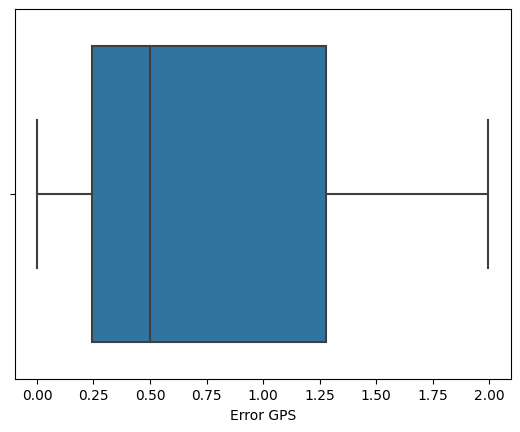

In [9]:
sns.boxplot(x=df['Error GPS'])

<AxesSubplot: xlabel='Altitude'>

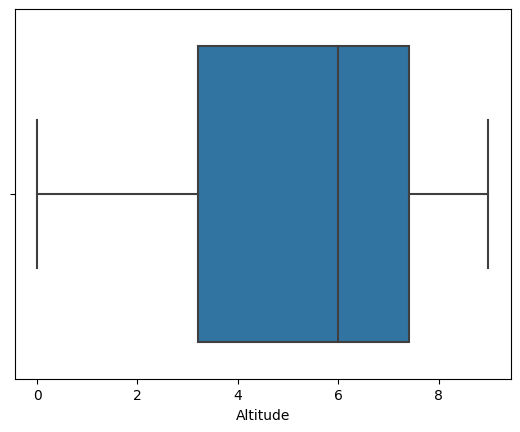

In [10]:
sns.boxplot(x=df['Altitude'])

<AxesSubplot: xlabel='Ground Speed'>

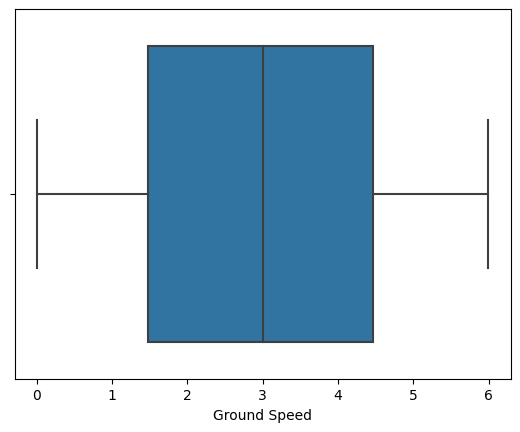

In [11]:
sns.boxplot(x=df['Ground Speed'])

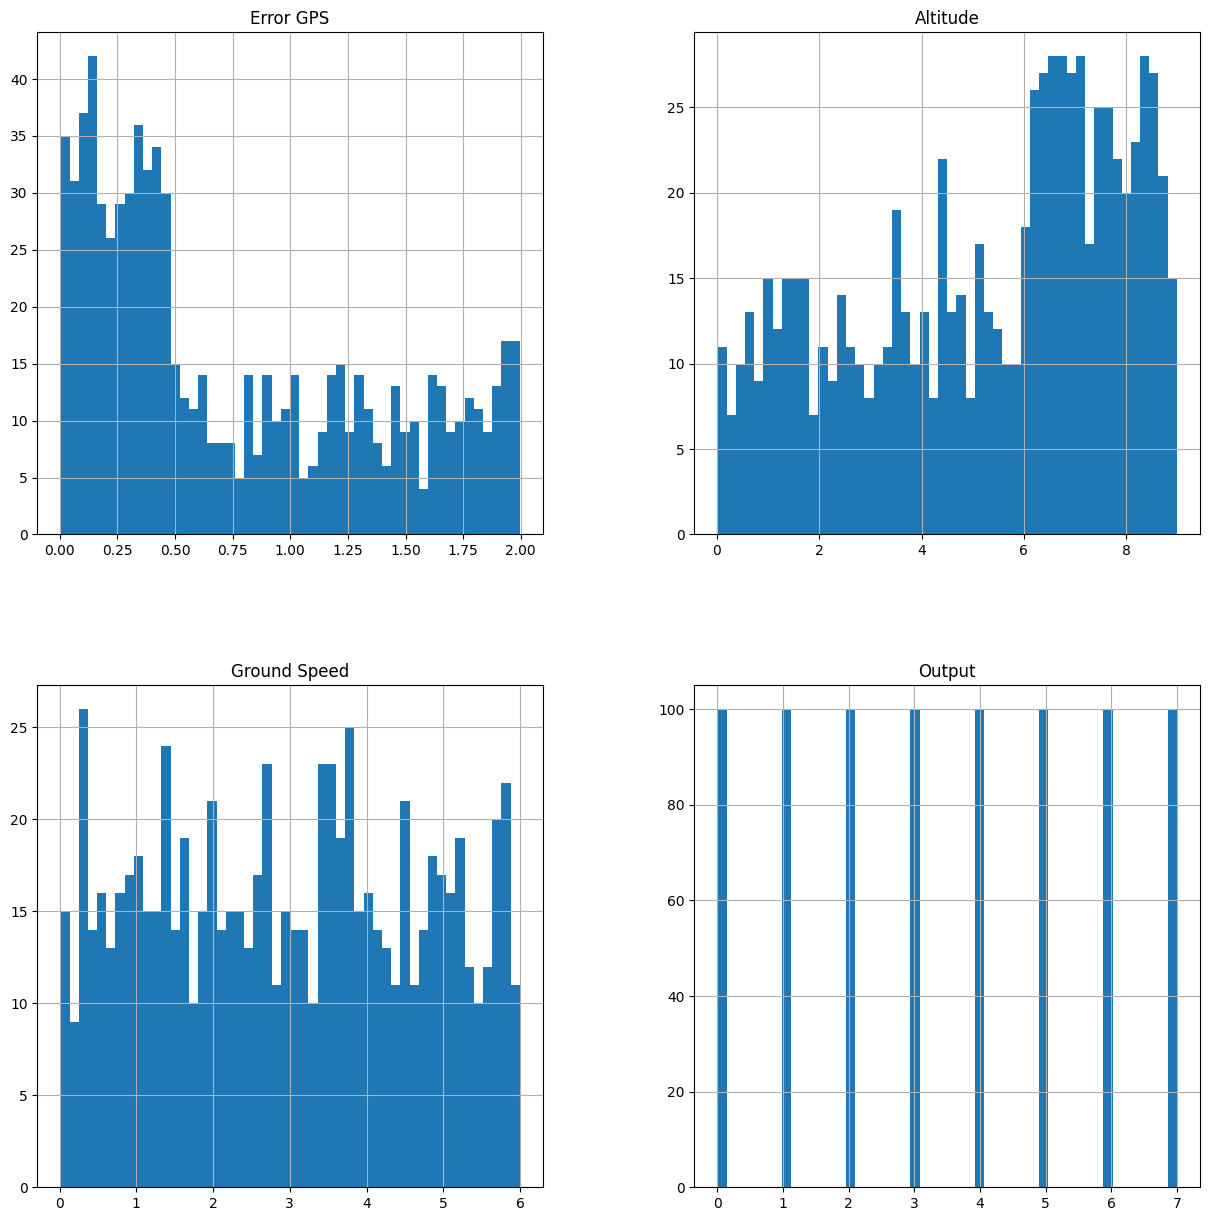

In [12]:
df.hist(bins=50, figsize=(15,15))
plt.show()

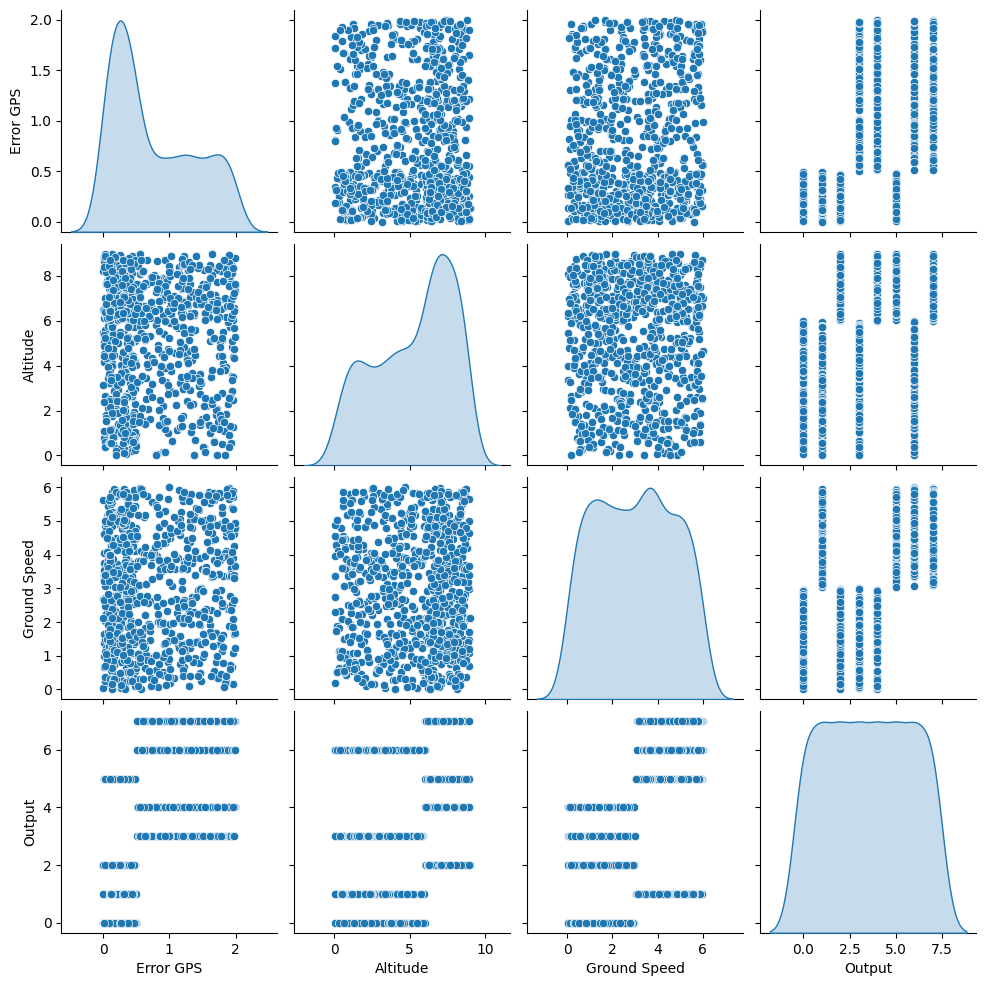

In [13]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

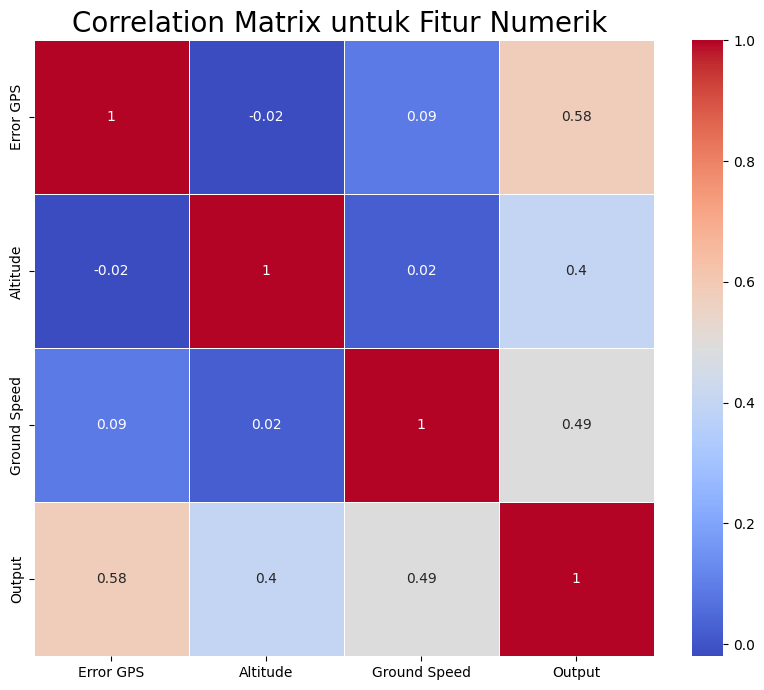

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [15]:
X = df.drop(["Output"],axis =1)
y = df[["Output"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(640, 3) (640, 1) (160, 3) (160, 1)


In [17]:
X_test

,Error GPS,Altitude,Ground Speed
696,1.978,4.736,4.603
667,1.648,2.472,5.623
63,0.131,0.759,0.437
533,0.018,8.838,3.199
66,0.370,1.213,1.862
...,...,...,...
589,0.095,7.040,3.217
798,1.611,7.196,5.097
744,1.564,7.632,4.385
513,0.052,6.129,4.071


In [18]:
print(X_test)
print(y_test)

     Error GPS  Altitude  Ground Speed
696      1.978     4.736         4.603
667      1.648     2.472         5.623
63       0.131     0.759         0.437
533      0.018     8.838         3.199
66       0.370     1.213         1.862
..         ...       ...           ...
589      0.095     7.040         3.217
798      1.611     7.196         5.097
744      1.564     7.632         4.385
513      0.052     6.129         4.071
670      0.633     5.180         5.177

[160 rows x 3 columns]
     Output
696       6
667       6
63        0
533       5
66        0
..      ...
589       5
798       7
744       7
513       5
670       6

[160 rows x 1 columns]


In [19]:
X_train

,Error GPS,Altitude,Ground Speed
264,0.379,8.126,2.445
615,0.807,0.052,3.965
329,1.788,5.150,2.484
342,1.277,4.121,2.214
394,1.788,1.464,2.571
...,...,...,...
71,0.339,3.766,0.622
106,0.423,5.029,4.792
270,0.406,7.623,0.244
435,0.528,6.903,1.992


In [20]:
y_train

,Output
264,2
615,6
329,3
342,3
394,3
...,...
71,0
106,1
270,2
435,4


In [21]:
X_train[0:1]

,Error GPS,Altitude,Ground Speed
264,0.379,8.126,2.445


In [22]:
y_train[0:1]

,Output
264,2


In [23]:
x_val = X_train[-139:]
y_val = y_train[-139:]

In [24]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Dense(2048, activation='relu'),
    #   tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(8, activation="softmax")])
# model = Sequential()
# # model.add(Conv1D(16, 2, activation="relu", input_shape=(4,1)))
# # model.add(BatchNormalization())
# # model.add(Flatten())
# # model.add(Dense(1024, activation='relu'))
# # model.add(Dense(512, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# tf.keras.layers.Dropout(0.5),
# model.add(Dense(512, activation='relu'))
# tf.keras.layers.Dropout(0.5),
# model.add(Dense(64, activation='relu'))
# # model.add(Dense(32, activation='relu')),
# model.add(Dense(8, activation="softmax"))

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1.000e-5),
                metrics=['accuracy'])

In [247]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 1024)              4096      
                                                                 
 dropout_39 (Dropout)        (None, 1024)              0         
                                                                 
 dense_116 (Dense)           (None, 512)               524800    
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                                 
 dense_117 (Dense)           (None, 256)               131328    
                                                                 
 dropout_41 (Dropout)        (None, 256)               0         
                                                                 
 dense_118 (Dense)           (None, 8)               

In [26]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98):
            print("\nAkurasi telah mencapai >=98%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [27]:
%%time
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=5000,   
    validation_data=(x_val, y_val),
    callbacks = [callbacks]
)

Epoch 1/5000
40/40 [==============================] - 3s 12ms/step - loss: 2.1626 - accuracy: 0.1359 - val_loss: 2.0388 - val_accuracy: 0.1295
Epoch 2/5000
40/40 [==============================] - 0s 6ms/step - loss: 2.1420 - accuracy: 0.1266 - val_loss: 2.0204 - val_accuracy: 0.1511
Epoch 3/5000
40/40 [==============================] - 0s 6ms/step - loss: 2.1087 - accuracy: 0.1469 - val_loss: 2.0031 - val_accuracy: 0.1871
Epoch 4/5000
40/40 [==============================] - 0s 5ms/step - loss: 2.0870 - accuracy: 0.1562 - val_loss: 1.9880 - val_accuracy: 0.2734
Epoch 5/5000
40/40 [==============================] - 0s 6ms/step - loss: 2.1081 - accuracy: 0.1609 - val_loss: 1.9750 - val_accuracy: 0.3237
Epoch 6/5000
40/40 [==============================] - 0s 5ms/step - loss: 2.0598 - accuracy: 0.1469 - val_loss: 1.9617 - val_accuracy: 0.2878
Epoch 7/5000
40/40 [==============================] - 0s 5ms/step - loss: 2.0873 - accuracy: 0.1422 - val_loss: 1.9495 - val_accuracy: 0.3237
Epoch

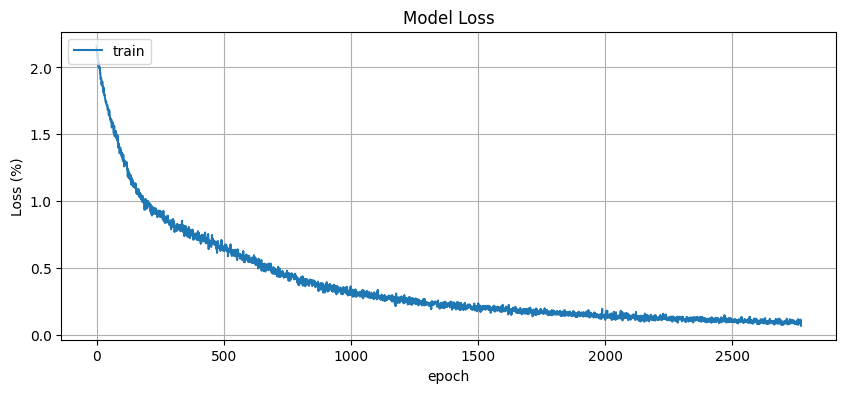

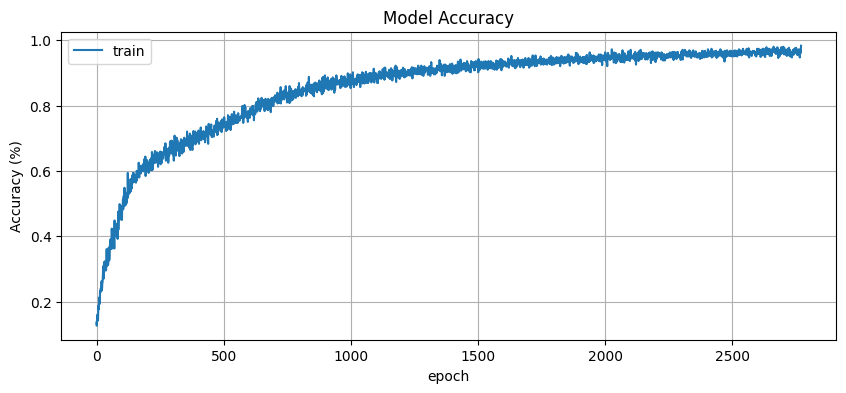

In [28]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss (%)')
# plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
# plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [31]:
def plot_mae(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

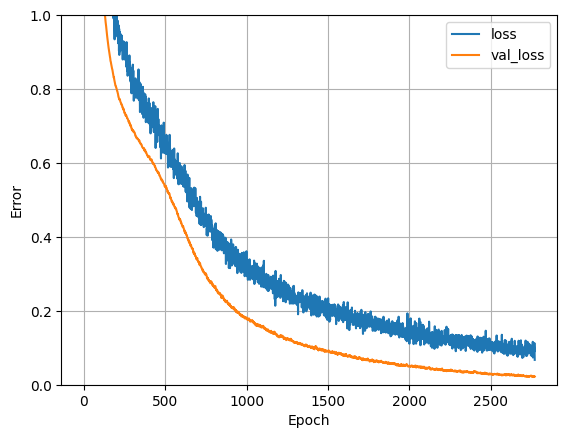

In [30]:
plot_loss(history)

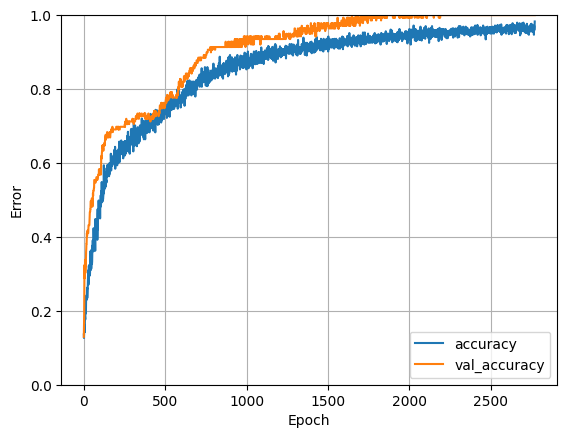

In [32]:
plot_mae(history)

In [241]:
X_test

,Error GPS,Altitude,Ground Speed
696,1.978,4.736,4.603
667,1.648,2.472,5.623
63,0.131,0.759,0.437
533,0.018,8.838,3.199
66,0.370,1.213,1.862
...,...,...,...
589,0.095,7.040,3.217
798,1.611,7.196,5.097
744,1.564,7.632,4.385
513,0.052,6.129,4.071


In [4]:
prediksi = model.predict(X_test[0:160])
ypred = np.array(prediksi)
hasil_pred = ypred.argmax(axis=1)
hasil_pred

NameError: name 'X_test' is not defined

In [220]:
X_test[0:1]

,Error GPS,Altitude,Ground Speed
696,1.978,4.736,4.603


In [221]:
y_test[0:1]

,Output
696,6


In [222]:
hasil = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [63]:
test_results = {}
test_results['model'] = model.evaluate(X, y, verbose=1)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [224]:
!mkdir -p saved_model
model.save('saved_model/model1.h5')

In [ ]:
save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

INFO:tensorflow:Assets written to: mymodel/assets


INFO:tensorflow:Assets written to: mymodel/assets


In [64]:
load_model('G:\My Drive\TA\SHR\Model\saved_model\model1.h5')

In [67]:
y_pred = model.predict(X[0:10])
y_pred
hasil_pred = ypred.argmax(axis=1)
hasil_pred

1/1 [==============================] - 0s 22ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [66]:
hasil_pred = ypred.argmax(axis=1)
hasil_pred

AxisError: axis 1 is out of bounds for array of dimension 1

In [68]:
reloaded = tf.keras.models.load_model('G:\My Drive\TA\SHR\Model\saved_model\model1.h5')

test_results['reloaded'] = reloaded.evaluate(
    X, y, verbose=1)

25/25 [==============================] - 0s 5ms/step - loss: 0.0465 - accuracy: 0.9875


In [69]:
pd.DataFrame(test_results, index=['Loss', 'Mean Absolute Error']).T

,Loss,Mean Absolute Error
reloaded,0.046525,0.9875


In [ ]:
model = tf.keras.models.load_model('G:\My Drive\TA\SHR\Model\saved_model\model1.h5',compile=False)

In [7]:
test_data = pd.read_csv("G:\My Drive\TA\SHR\Model\Datatest.csv")

In [8]:
test_data

,Error GPS,Altitude,Ground Speed,Output
0,0.212,1.967,2.450,0
1,0.077,1.236,2.033,0
2,0.014,3.478,1.318,0
3,0.173,0.572,2.260,0
4,0.224,2.064,0.854,0
...,...,...,...,...
195,1.136,7.375,3.789,7
196,1.257,8.356,5.102,7
197,1.335,6.021,4.590,7
198,0.566,7.935,3.507,7


In [9]:
x_test= test_data.drop('Output', axis=1)
y_test = test_data['Output']

In [10]:
x_test

,Error GPS,Altitude,Ground Speed
0,0.212,1.967,2.450
1,0.077,1.236,2.033
2,0.014,3.478,1.318
3,0.173,0.572,2.260
4,0.224,2.064,0.854
...,...,...,...
195,1.136,7.375,3.789
196,1.257,8.356,5.102
197,1.335,6.021,4.590
198,0.566,7.935,3.507


In [11]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
195    7
196    7
197    7
198    7
199    7
Name: Output, Length: 200, dtype: int64

In [12]:
x = 0
y = 1
hasil_prediksi = []
for i in range(200):
  prediksi = model.predict(x_test[x:y])
  kelas = np.argmax(prediksi)
  hasil_prediksi.append(kelas)
  x+=1
  y+=1
print(hasil_prediksi)
ypred = np.array(hasil_prediksi)

1/1 [==============================] - 0s 23ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


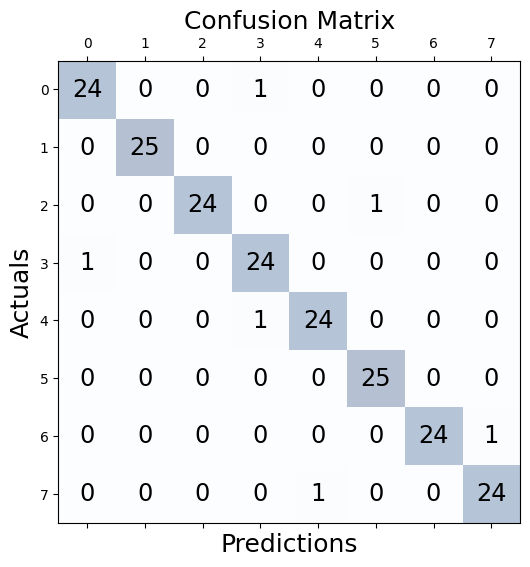

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      1.00      1.00        25
           2       0.96      1.00      0.98        24
           3       0.96      0.92      0.94        26
           4       0.96      0.96      0.96        25
           5       1.00      0.96      0.98        26
           6       0.96      1.00      0.98        24
           7       0.96      0.96      0.96        25

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [13]:
conf_matrix = confusion_matrix(y_true=y_test[0:200], y_pred=ypred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
report = classification_report(ypred, y_test[0:200])
print(report)

In [14]:
df_test = pd.DataFrame(ypred)

In [15]:
data = {'Error GPS': [1.395],
        'Altitude' : [7.085],
        'Ground Speed': [4.22]}
data_test = pd.DataFrame(data)
data_test
x = 0
y = 1
hasil_prediksi = []
for i in range(1):
  prediksi = model.predict(data_test[x:y])
  kelas = np.argmax(prediksi)
  hasil_prediksi.append(kelas)
  x+=1
  y+=1
print(hasil_prediksi)
ypred = np.array(hasil_prediksi)

1/1 [==============================] - 0s 21ms/step
[7]
